## R - Language usage

Exploring resources like uc-r.github.io/word and the RStudio text mining guide showed us that R offers efficient, well-documented tools for deep word and sentiment analysis. Using R's tidytext and dplyr,
we could quickly tokenize Reddit comments, map words to sentiment scores (AFINN), and study word relationships with reliable code and examples. For this part we used this language because R provides
more direct workflows for linking words to sentiment and building text networks, comparing to python possibilitis.

In [ ]:
library(readr)
library(dplyr)

df <- read_csv("/path to/cleaned_all_data.csv")



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Rows: 3587384 Columns: 20
-- Column specification --------------------------------------------------------
Delimiter: ","
chr   (6): comment_id, author, body, subreddit, link_id, permalink
dbl   (1): score
lgl  (12): government_mentioned, fire_mentioned, lafd_related, urban_plannin...
dttm  (1): datetime

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
MY_COLOR_LIST <- c(
  "#ffa600",  # main_yellow
  "#ff6361",  # accent_coral
  "#bc5090",  # mid_pink
  "#58508d",  # mid_purple
  "#003f5c"   # dark_blue
)


In [3]:
install.packages("tm", repos="https://cran.r-project.org")
library(tm)
install.packages("dplyr", repos="https://cran.r-project.org")
install.packages("readr", repos="https://cran.r-project.org")
install.packages("data.table")


The downloaded binary packages are in
	/var/folders/s9/k913sg5d1ks4dfz2wkwwmk700000gn/T//RtmpGTKdeB/downloaded_packages


Loading required package: NLP




The downloaded binary packages are in
	/var/folders/s9/k913sg5d1ks4dfz2wkwwmk700000gn/T//RtmpGTKdeB/downloaded_packages

The downloaded binary packages are in
	/var/folders/s9/k913sg5d1ks4dfz2wkwwmk700000gn/T//RtmpGTKdeB/downloaded_packages

The downloaded binary packages are in
	/var/folders/s9/k913sg5d1ks4dfz2wkwwmk700000gn/T//RtmpGTKdeB/downloaded_packages


In [4]:
install.packages("tidytext")
install.packages("stringr", repos="https://cran.r-project.org", quiet=TRUE)
install.packages("ggplot2", repos="https://cran.r-project.org", quiet=TRUE)


The downloaded binary packages are in
	/var/folders/s9/k913sg5d1ks4dfz2wkwwmk700000gn/T//RtmpGTKdeB/downloaded_packages


In [5]:
library(readr)
library(data.table)
library(dplyr)
library(tidytext)
library(stringr)
library(ggplot2)


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last



Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate




In [ ]:
rdf <- fread("/path to/cleaned_all_data.csv")


In [7]:

Sys.getlocale()

[1] "C"

### Attitude towards government mentioned in selected subreddits (sentiment analysis) through months

**4.4 How did public sentiment toward the government fluctuate on a daily basis across the selected months?**

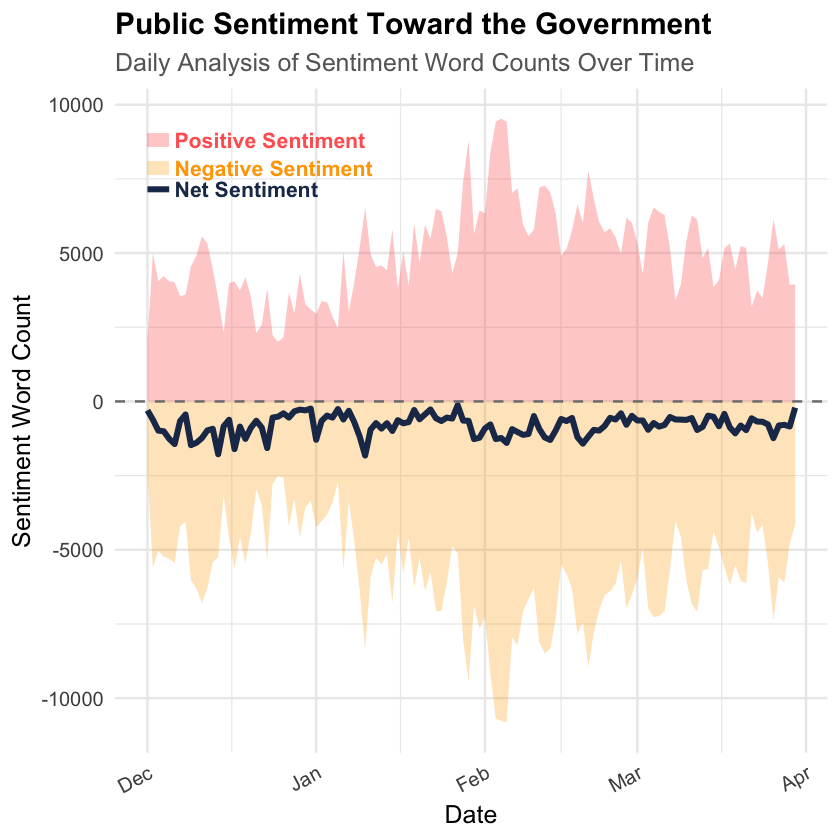

In [ ]:
library(dplyr)
library(stringr)
library(tidytext)
library(tidyr)
library(ggplot2)

government_keywords <- "government|mayor|president|officials|administration|council|newsom|governor|authority|politicians|federal|state|local|authorities|leadership|elected|representative"


df_gov <- df %>% 
  filter(str_detect(body, government_keywords))


bing <- get_sentiments("bing")
df_sent <- df_gov %>%
  unnest_tokens(word, body) %>%
  inner_join(bing, by = "word", relationship = "many-to-many") %>%
  mutate(date = as.Date(datetime))


daily_gov_sentiment <- df_sent %>%
  count(date, sentiment) %>%
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  mutate(net_sentiment = positive - negative)


POS_COLOR <- "#ff6361"  
NEG_COLOR <- "#ffa600" 
NET_COLOR <- "#1d3557" 

p <- ggplot(daily_gov_sentiment, aes(x = date)) +
  

  geom_area(aes(y = positive), fill = POS_COLOR, alpha = 0.32) +
  geom_area(aes(y = -negative), fill = NEG_COLOR, alpha = 0.28) +
  geom_line(aes(y = net_sentiment), color = NET_COLOR, size = 1.7) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey50", size = 0.7) +
  

  {
    start_date <- min(daily_gov_sentiment$date)
    max_y <- max(daily_gov_sentiment$positive, na.rm = TRUE) 
    
    list(
      annotate("rect", xmin = start_date, xmax = start_date + 4, 
               ymin = max_y * 0.95, ymax = max_y * 0.90, fill = POS_COLOR, alpha = 0.32),
      annotate("text", x = start_date + 5, y = max_y * 0.925, 
               label = "Positive Sentiment", color = POS_COLOR, fontface = "bold", size = 4.5, hjust = 0),
      
      annotate("rect", xmin = start_date, xmax = start_date + 4, 
               ymin = max_y * 0.85, ymax = max_y * 0.80, fill = NEG_COLOR, alpha = 0.28),
      annotate("text", x = start_date + 5, y = max_y * 0.825, 
               label = "Negative Sentiment", color = NEG_COLOR, fontface = "bold", size = 4.5, hjust = 0),
      
      annotate("segment", x = start_date, xend = start_date + 4, 
               y = max_y * 0.75, yend = max_y * 0.75, color = NET_COLOR, size = 1.7),
      annotate("text", x = start_date + 5, y = max_y * 0.75, 
               label = "Net Sentiment", color = NET_COLOR, fontface = "bold", size = 4.5, hjust = 0)
    )
  } +
  
  labs(
    title = "Public Sentiment Toward the Government",
    subtitle = "Daily Analysis of Sentiment Word Counts Over Time", 
    x = "Date",
    y = "Sentiment Word Count"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    legend.position = "none", 
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(color = "grey40"),
    axis.text.x = element_text(angle = 28, hjust = 1)
  )

print(p)

This bar chart analyses the comparison of government mentions by group.
It is clearly seen that this visualisation shows the negative segment bar is slightly higher in the government category analysis, thought in the government+ conspiracy segment the negative bar is showing higher lever of pessimistic mentioning.

**4.5 Are there observable shifts in attitudes toward the government in connection with references to conspiracy theories?**

Joining with `by = join_by(word)`
Warning message in inner_join(., bing_lexicon):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 378949 of `x` matches multiple rows in `y`.
i Row 5115 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."
Joining with `by = join_by(word)`
Warning message in inner_join(., bing_lexicon):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 399377 of `x` matches multiple rows in `y`.
i Row 3805 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


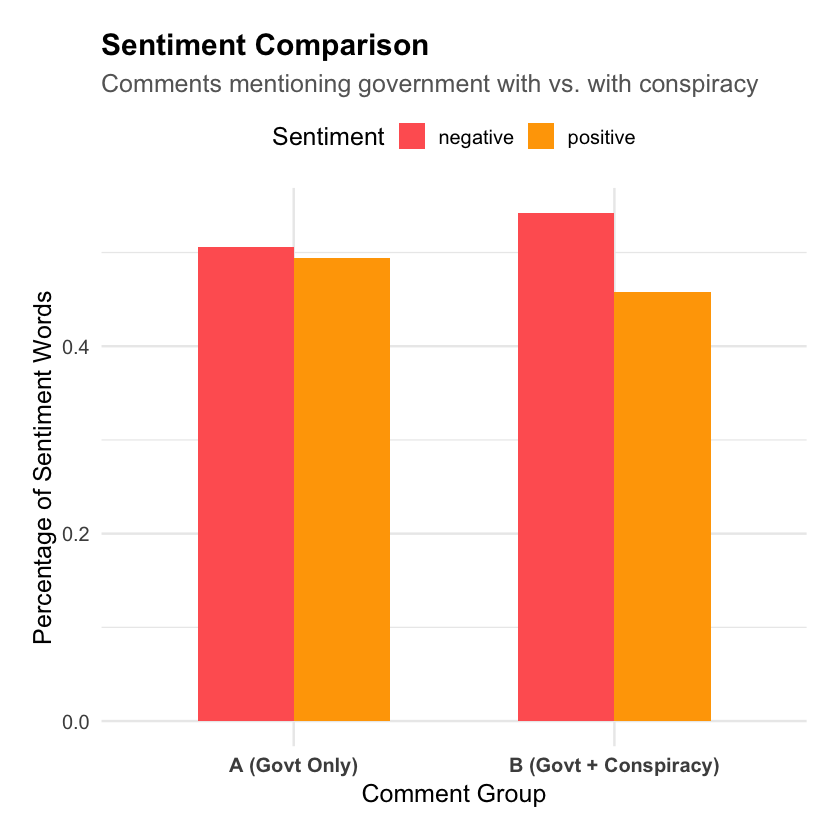

In [ ]:
govt_regex <- "mayor|bass|caruso|officials|council|administration|governor|newsom|bureaucrats|politicians|government|federal|state|local|authorities|leadership|elected|representatives|senators|congressmen|lawmakers|legislature|agency|agencies|department|departments|supervisor|supervisors|commissioner|commissioners|regime|establishment|insiders|swamp|elites|ruling|power|powers|policymakers|regulators|executive|municipal|city|county|democrat|gop|republican|political|politics|partisan|left|right|liberal|progressive|conservative"

conspiracy_regex <- "DEW|Lasers|geo-engineered|weaponization|Diddy|Sean|tunnels|celebrities|Playboy|Combs|Getty|Hollywood|elite|trafficking|Artificial intelligence|AI|generated|ChatGPT|fake|disinformation|misinformation|Jewish|Resnicks|DEI|Jews|Jew|Antisemitic|cloudseeding|Katja Friedrichz|winds|Santa|climate|drought|conditions|weather|manipulation|geoengineering|Conspiracy|awakened|propaganda|Agenda2030|landgrab|SmartLA|SmartCity"

rdf_filtered <- rdf %>%
  filter(!is.na(body)) %>%
  mutate(
    mentions_govt = str_detect(body, govt_regex),
    mentions_conspiracy = str_detect(body, conspiracy_regex)
  )

group_A <- rdf_filtered %>%
  filter(mentions_govt == TRUE & mentions_conspiracy == FALSE) %>%
  select(comment_id, body)

group_B <- rdf_filtered %>%
  filter(mentions_govt == TRUE & mentions_conspiracy == TRUE) %>%
  select(comment_id, body)

bing_lexicon <- get_sentiments("bing")

if(nrow(group_A) > 0){
  sentiment_A <- group_A %>%
    unnest_tokens(word, body) %>%
    inner_join(bing_lexicon) %>%
    count(sentiment) %>%
    mutate(percentage = n / sum(n),
           group = "A (Govt Only)")
} else {
  sentiment_A <- data.frame(sentiment = c("positive", "negative"),
                            n = 0, percentage = 0,
                            group = "A (Govt Only)")
}

if(nrow(group_B) > 0){
  sentiment_B <- group_B %>%
    unnest_tokens(word, body) %>%
    inner_join(bing_lexicon) %>%
    count(sentiment) %>%
    mutate(percentage = n / sum(n),
           group = "B (Govt + Conspiracy)")
} else {
  sentiment_B <- data.frame(sentiment = c("positive", "negative"),
                            n = 0, percentage = 0,
                            group = "B (Govt + Conspiracy)")
}

combined_sentiment <- bind_rows(sentiment_A, sentiment_B)
combined_sentiment$group <- factor(combined_sentiment$group,
                                   levels = c("A (Govt Only)", "B (Govt + Conspiracy)"))

ggplot(combined_sentiment, aes(x = group, y = percentage, fill = sentiment)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.6) +
  scale_fill_manual(values = c("negative" = "#ff6361", "positive" = "#ffa600")) +
  labs(
    title = "Sentiment Comparison",
    subtitle = "Comments mentioning government with vs. with conspiracy",
    x = "Comment Group",
    y = "Percentage of Sentiment Words",
    fill = "Sentiment"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(color = "grey40"),
    axis.text.x = element_text(face = "bold"),
    legend.position = "top",
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)  
)


This bar chart analyses the comparison of government mentions by group. We take group A (comments only with government mentions) and group B (government and conspiracy theories of fire falsifications). It is clearly seen that this visualisation shows the negative segment bar is slightly higher in the government category analysis, though in the government+conspiracy segment the negative bar is showing a higher level of pessimistic mention. This confirms our hypothesis that people's attitudes towards the authorities have deteriorated due to events related to the course of the fires.

**4.6 How did government-related sentiment evolve within the conspiracy subreddit, specifically in comments that mention fire?**

Warning message in inner_join(., bing, by = "word"):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 592260 of `x` matches multiple rows in `y`.
i Row 2928 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


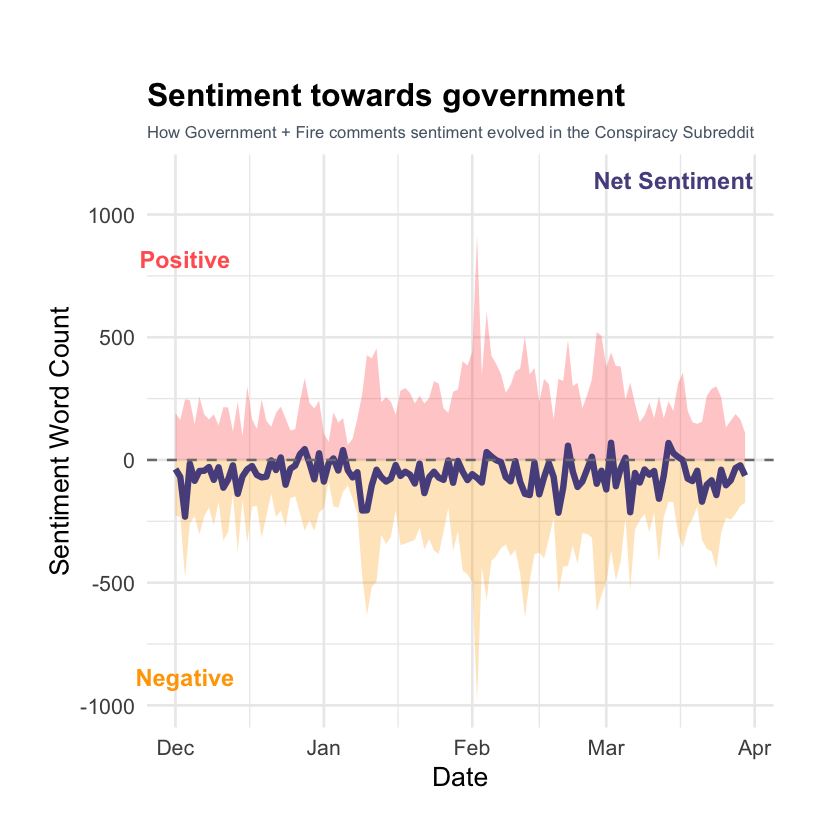

In [ ]:
library(tidyverse)
library(tidytext)
library(lubridate)
library(readr)
library(ggplot2)


df_gov_consp_fire <- rdf %>%
  filter(
    subreddit == 'conspiracy',
    fire_mentioned == TRUE,
    str_detect(body, "government|mayor|president|officials|administration|council|newsom|governor|authority|politicians|federal|state|local|authorities|leadership|elected|representative")
  )

bing <- get_sentiments("bing")
df_sent <- df_gov_consp_fire %>%
  unnest_tokens(word, body) %>%
  inner_join(bing, by = "word") %>%
  mutate(date = as.Date(datetime))

daily_gov_sentiment <- df_sent %>%
  group_by(date, sentiment) %>%
  tally(name = "n") %>%
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  mutate(net_sentiment = positive - negative)

last_val <- tail(daily_gov_sentiment$net_sentiment, 1)        
y_lift <- max(daily_gov_sentiment$positive, na.rm = TRUE) * 1.25

ggplot(daily_gov_sentiment, aes(x = date)) +
  geom_area(aes(y = positive), fill = "#ff6361", alpha = 0.33) +
  geom_area(aes(y = -negative), fill = "#ffa600", alpha = 0.28) +
  geom_line(aes(y = net_sentiment), color = "#58508d", size = 1.8) +
  geom_hline(yintercept = 0, linetype = "dashed",
             color = "#7b7b7b", size = 0.7) +

  annotate("text",
           x = min(daily_gov_sentiment$date) + 2,
           y = max(daily_gov_sentiment$positive)*0.9,
           label = "Positive", color="#ff6361", fontface="bold", size=5) +

  annotate("text",
           x = min(daily_gov_sentiment$date) + 2,
           y = -max(daily_gov_sentiment$negative)*0.9,
           label = "Negative", color="#ffa600", fontface="bold", size=5) +

  annotate("text",
         x = max(daily_gov_sentiment$date) - 15,  
         y = y_lift,
         label = "Net Sentiment",
         color="#58508d", fontface="bold", size=5) +


labs(
  title = "Sentiment towards government",
  subtitle = "How Government + Fire comments sentiment evolved in the Conspiracy Subreddit",
  x = "Date", y = "Sentiment Word Count"
) +
theme_minimal(base_size=16) +
theme(
  plot.title = element_text(face="bold"),
  plot.subtitle = element_text(color="#576574", size = 10),  
  plot.margin = margin(t=50, r=40, b=30, l=30)
)+
coord_cartesian(clip="off")




The graph tracks how sentiment toward the government changed over four months in the conspiracy subreddit, focusing only on comments that discussed both fire and government-related topics. The red and orange shaded areas show how many positive and negative sentiment words appeared in these comments day by day, while the dark blue line represents the net difference between positive and negative sentiment.

The peaks of negative sentiment often coincide with larger spikes in fire and government discussions. These likely reflect incidents or controversies that triggered community outrage or distrust. Positive sentiment does exist, indicating not every discussion is fully negative, but it’s usually not strong enough to reverse the dominant trend.

**4.7 How did attitudes toward the government change throughout January in comments across all subreddits that include references to conspiracy theories?**

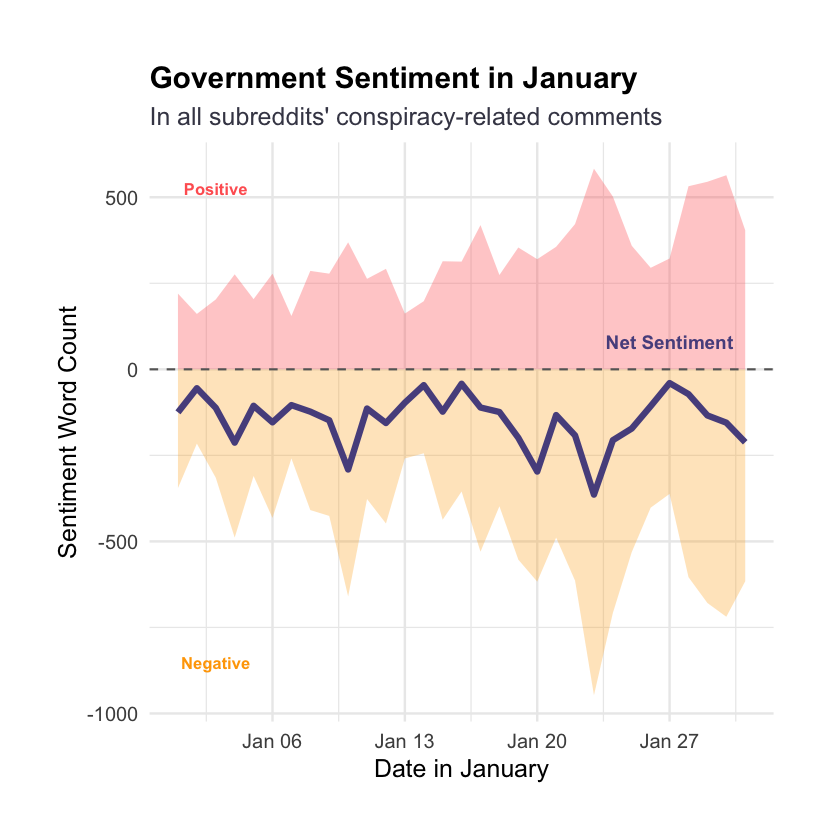

In [ ]:
library(dplyr)
library(stringr)
library(tidytext)
library(tidyr)
library(ggplot2)


conspiracy_keywords <- "(conspir|hoax|deep state|illuminati|cover[-_ ]?up|
                         false flag|psy[-_ ]?op|secret society|shadow government|
                         mind control|agenda|cabal|mk ultra|qanon|great reset|plandemic)"
government_keywords <- "government|mayor|president|officials|administration|council|
                        newsom|governor|authority|politicians|federal|state|local|
                        authorities|leadership|elected|representative"

df_jan_consp_gov <- rdf %>%
  filter(
    as.Date(datetime) >= as.Date("2025-01-01") &
    as.Date(datetime) <= as.Date("2025-01-31"),
    str_detect(body, conspiracy_keywords),
    str_detect(body, government_keywords)
  )

bing <- get_sentiments("bing")

df_sent <- df_jan_consp_gov %>%
  unnest_tokens(word, body) %>%
  inner_join(bing, by="word") %>%
  mutate(date = as.Date(datetime))

daily_gov_sentiment <- df_sent %>%
  group_by(date, sentiment) %>%
  tally(name="n") %>%
  pivot_wider(names_from=sentiment, values_from=n, values_fill=0) %>%
  mutate(net_sentiment = positive - negative)

peak_point <- daily_gov_sentiment[which.max(daily_gov_sentiment$net_sentiment), ]
x_lab <- peak_point$date
y_lab <- peak_point$net_sentiment + 120  


ggplot(daily_gov_sentiment, aes(x=date)) +
  geom_area(aes(y = positive), fill="#ff6361", alpha=0.33) +
  geom_area(aes(y = -negative), fill="#ffa600", alpha=0.28) +
  geom_line(aes(y = net_sentiment), color="#58508d", size=1.8) +
  geom_hline(yintercept=0, linetype="dashed", color="#666", size=0.6) +

  annotate("text", x=min(daily_gov_sentiment$date)+2,
           y=max(daily_gov_sentiment$positive)*0.9,
           label="Positive", color="#ff6361", fontface="bold", size=3.5) +

  annotate("text", x=min(daily_gov_sentiment$date)+2,
           y=-max(daily_gov_sentiment$negative)*0.9,
           label="Negative", color="#ffa600", fontface="bold", size=3.5) +

  annotate("text", x=x_lab, y=y_lab,
           label="Net Sentiment", color="#58508d",
           fontface="bold", size=4) +

  labs(
    title="Government Sentiment in January",
    subtitle="In all subreddits' conspiracy-related comments",
    x="Date in January", y="Sentiment Word Count"
  ) +

  theme_minimal(base_size=15) +
  theme(
    plot.title=element_text(face="bold"),
    plot.subtitle=element_text(color="#445"),
    plot.margin=margin(t=40, r=40, b=35, l=35)
  ) +
  coord_cartesian(clip="off")


This visualization indicates that conspiracy-linked discourse about the government in January was predominantly negative, showing persistent skepticism, criticism, or anger toward authorities among researched subreddits. Government sentiment in the context of conspiracy theories remained unfavorable and reactive, rather than supportive, across the whole month.

The red shaded area represents positive sentiment words, while the orange area below zero represents negative sentiment words—blue line tracks the net daily sentiment.